Before we start, run the code cell below for a nicer layout.

In [1]:
%%html
<style>
h1 { margin-top: 3em !important; }
h2 { margin-top: 2em !important; }
h3 { margin-top: 1em !important; }
#notebook-container { 
    width: 50% !important; 
    min-width: 800px;
}
</style>

<h1>Matplotlib</h1>

The library <a href="https://matplotlib.org/">matplotlib</a> is a powerful plotting and visualization library. It is at time somewhat difficult to use: for historical reasons, the library presents two distinct ways to use it and you will find examples of either online, sometimes even mixed. I recommend to stick to the so-called object-oriented way: it presents all important pieces of the plot as python objects which we can manipulate.

The first step to learning matplotlib is to understand the terminology that is used. The following figure from the <a href="https://matplotlib.org/faq/usage_faq.html">matplotlib FAQ</a> provides a good overview:
<img style="width: 80%" src="04-resources/matplotlib.png" />

Very important: a matplotlib `figure` is the whole image and it can multiple plots. Every plot in a `figure` is represented by an `axes` object. We can generate a figure with a single axes object as follows:

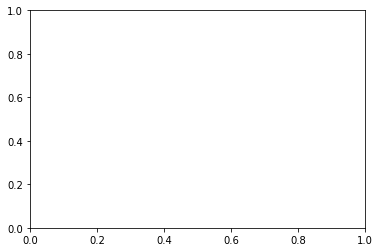

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

Jupyter should display an empty coordinate system (sometimes you have to run a cell twice for the output to appear).

The name `.subplots(...)` method actually allows us to generate multiple axes in a certain arrangement, but for now we will use it to generate a single plot only. So, what can we do with an axes object? 

First, we can draw a collection of points using `ax.scatter(...)`. This method expects the x and y coordinates in two lists. The following draws three points at $(0,0)$, $(1,1)$, and $(2,0)$:

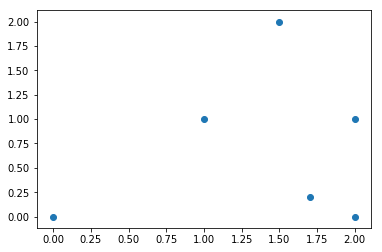

In [6]:
fig, ax = plt.subplots()
# Try changing and adding values to these two lists.
# They need to have the same length!
xs = [0,1,2, 1.5,2, 1.7]   
ys = [0,1,0, 2, 1, 0.2] 
ax.scatter(xs, ys)

A related method is `ax.plot(...)` which draws a line through the points (in the provided order!)

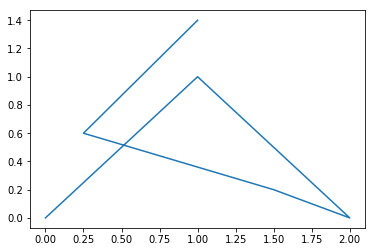

In [7]:
fig, ax = plt.subplots()
# Try changing and adding values to these two lists.
# They need to have the same length!
xs = [0,1,2, 1.5, .25, 1]   
ys = [0,1,0, .2, .6, 1.4] 
ax.plot(xs, ys)

Both `ax.scatter(...)` and `ax.plot(...)` can be customized extensively: we can change the colour, line thickness, marker size and shape, and many more things. If you are interested in those features, the <a href="https://matplotlib.org/gallery.html">matplotlib gallery</a> is a good starting point.

<h2>Plotting shark data</h2>

Let's see how `matplotlib` and `pandas` can be combined. Let's load up the cleaned up shark dataset you created in the lab:

In [10]:
import pandas as pd

sharks = pd.read_csv('04-resources/sharks-cleaned.csv', index_col=0)
sharks.head(5)

,Year,Country,Activity,Age,Species,Sex,Species
0,2018,USA,Paddling,57,White shark,F,White shark
6,2018,BRAZIL,Swimming,18,Tiger shark,M,Tiger shark
7,2018,USA,Fishing,52,"Lemon shark, 3'",M,"Lemon shark, 3'"
8,2018,USA,Walking,15,"Bull shark, 6'",M,"Bull shark, 6'"
10,2018,AUSTRALIA,Feeding sharks,32,Grey reef shark,M,Grey reef shark


Let us plot the number of attacks per year as a line-plot. For that we need to aggregate the number of attacks per year, this is easily done with the `.value_counts()` method.

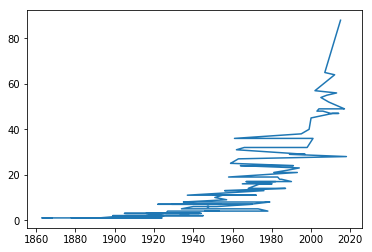

In [11]:
per_year = sharks['Year'].value_counts()
fig, ax = plt.subplots()
ax.plot(per_year.index, per_year.values)

That does not look like a proper line plot! The `per_year` series is indexed by year, but it is sorted by the values (so the year with the highest value comes first). We can fix this by using the `.sort_index` method:

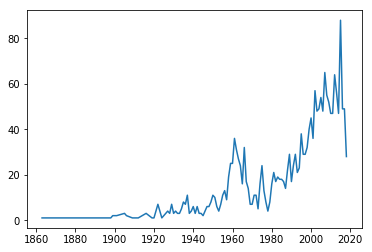

In [7]:
per_year = sharks['Year'].value_counts().sort_index()
fig, ax = plt.subplots()
ax.plot(per_year.index, per_year.values)

Much better! We can see that the number of reported shark attachs have increases almost continuously, with an interesting peak in the 60s.

Let's also do a scatter plot. The only sensible columns of the sharks dataset to plot against each other are the `Year` and `Age` column: that way we can get a rough idea of how the age-makeup of shark victims changed over time (this is certainly not the best way of visualizing this data since we cannot see how many datapoints are on top of each other, but we have to start with the basics):

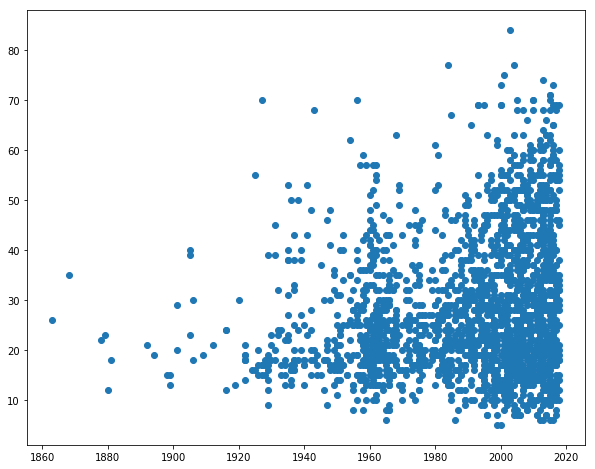

In [12]:
# figsize controls the size of the figure
fig, ax = plt.subplots(figsize=(10,8)) 
ax.scatter(sharks['Year'], sharks['Age'])

<h2>Pandas <tt>.plot</tt></h2>

Pandas is tightly integrated with `matplotlib`. Dataframes have a `.plot(...)` method that uses `matplotlib` to plot the data contained in it in various ways. If we simply call `.plot()` without any arguments, pandas will plot every numeric column against the index:

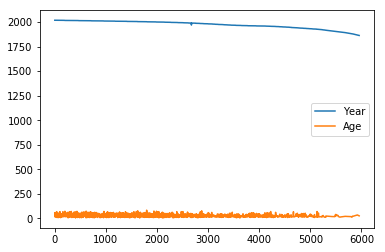

In [13]:
sharks.plot()

For our dataset, this is absolutely pointless. The `.plot(...)` method takes the argument `kind` which allows us to choose from one of eleven values (see <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html">here</a> for a complete list). Relevant to us here is the `kind="hist"` which plots a histogram:

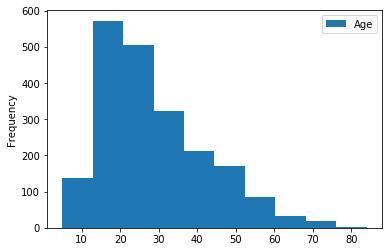

In [14]:
sharks[["Age"]].plot(kind="hist")

It is best to create a dataframe with a single column (`sharks[["Age"]]`) because pandas otherwise makes somewhat weird choices for what to plot. We can do the same with the `Year` column, let us also adjust the number of bins using the named argument `bins`:

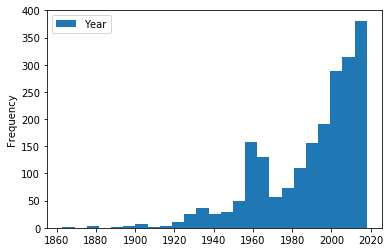

In [11]:
sharks[["Year"]].plot(kind="hist", bins=25)

As a last example, let us figure out which sharks are responsible for the most attacks. We again can use the `.value_counts()` method to count how often certain values appear in the `Species` column:

In [28]:
types = sharks["Species"].value_counts()
types.head(5)

White shark                        94
Shark involvement not confirmed    45
Tiger shark                        44
Invalid                            38
4' shark                           35
Name: Species, dtype: int64

There are over a thousand values in this column, mostly because the fields often contain lengthy descriptions&mdash;for a proper analysis, we would have to find a way to summarize this information properly (e.g. search for certain keywords in those descriptions).
Since it is Friday and the weekend is near, we'll settle for a simple plot of those values that appear very frequently:

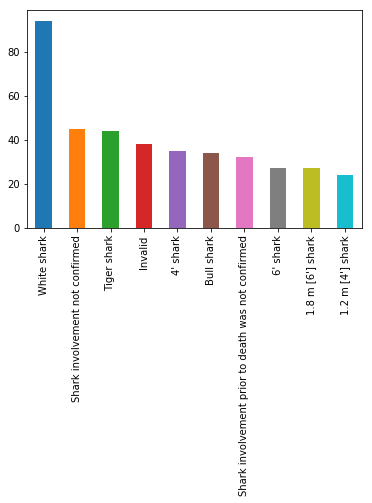

In [23]:
types[types > 20].plot(kind="bar")